
### Geometric-Mean Consensus Explained

The concept of **geometric-mean consensus** in multi-agent systems is a fascinating topic. It involves agents in a network reaching an agreement on a certain quantity by iteratively updating their states based on the geometric mean of their neighbors' states.

In a **geometric-mean consensus**, each agent updates its state to the geometric mean of its own state and the states of its neighbors. Mathematically, if we denote the state of agent $i$ at time $t$ as $x_i(t)$, the update rule can be expressed as:

$$
x_i(t+1) = \left( \prod_{j \in \mathcal{N}_i} x_j(t) \right)^{\frac{1}{|\mathcal{N}_i|}}
$$

where $\mathcal{N}_i$ is the set of neighbors of agent $i$, and $|\mathcal{N}_i|$ is the number of neighbors.

### Visual Example

Let's consider a simple network of four agents arranged in a line:

```
A -- B -- C -- D
```

- **Initial States**: Suppose the initial states of the agents are:
  - $x_A(0) = 4$
  - $x_B(0) = 2$
  - $x_C(0) = 8$
  - $x_D(0) = 16$

- **First Update**:
  - Agent A: $x_A(1) = \sqrt{x_A(0) \cdot x_B(0)} = \sqrt{4 \cdot 2} = \sqrt{8} \approx 2.83$
  - Agent B: $x_B(1) = \sqrt{x_A(0) \cdot x_C(0)} = \sqrt{4 \cdot 8} = \sqrt{32} \approx 5.66$
  - Agent C: $x_C(1) = \sqrt{x_B(0) \cdot x_D(0)} = \sqrt{2 \cdot 16} = \sqrt{32} \approx 5.66$
  - Agent D: $x_D(1) = \sqrt{x_C(0) \cdot x_D(0)} = \sqrt{8 \cdot 16} = \sqrt{128} \approx 11.31$

- **Second Update**:
  - Agent A: $x_A(2) = \sqrt{x_A(1) \cdot x_B(1)} = \sqrt{2.83 \cdot 5.66} \approx 4$
  - Agent B: $x_B(2) = \sqrt{x_A(1) \cdot x_C(1)} = \sqrt{2.83 \cdot 5.66} \approx 4$
  - Agent C: $x_C(2) = \sqrt{x_B(1) \cdot x_D(1)} = \sqrt{5.66 \cdot 11.31} \approx 8$
  - Agent D: $x_D(2) = \sqrt{x_C(1) \cdot x_D(1)} = \sqrt{5.66 \cdot 11.31} \approx 8$

After several iterations, the states of all agents will converge to the same value, achieving consensus.

### Applications

Geometric-mean consensus is particularly useful in scenarios where the states represent quantities that should be combined multiplicatively, such as in certain economic models or in distributed estimation problems where the product of measurements is more meaningful than their sum.


Agent Number  1  with State : 1.224744871391589
Agent Number  2  with State : 2.9154759474226504
Agent Number  3  with State : 3.1622776601683795
Agent Number  4  with State : 2.449489742783178
Agent Number  1  with State : 1.01737662873862
Agent Number  2  with State : 1.3027335964837619
Agent Number  3  with State : 1.6049693212575147
Agent Number  4  with State : 1.1844584630698913
Agent Number  1  with State : 0.7615954019724617
Agent Number  2  with State : 0.856678451020808
Agent Number  3  with State : 0.8871306491631015
Agent Number  4  with State : 0.835079005892168


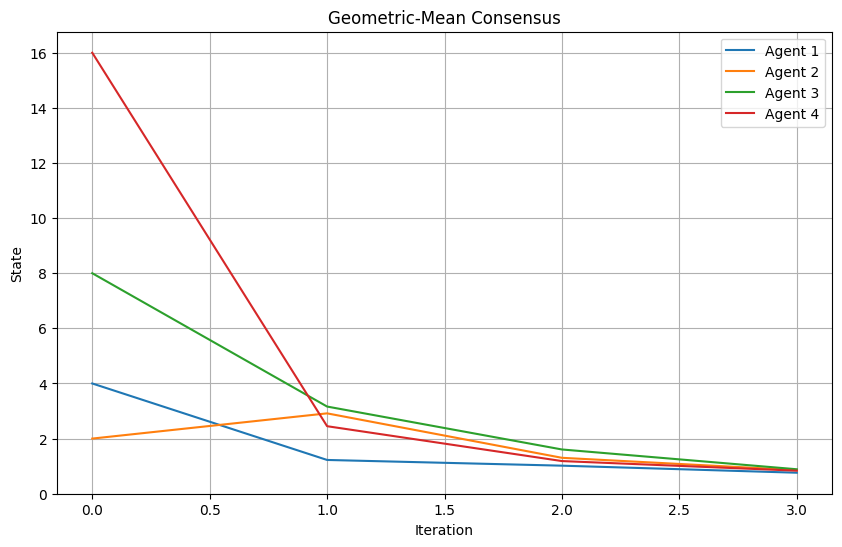

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initial states of the agents
states = np.array([4, 2, 8, 16], dtype=float)

# Adjacency matrix representing the network
# A -- B -- C -- D
adj_matrix = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0]
])

def geometric_mean_consensus(states, adj_matrix, iterations=10):
    num_agents = len(states)
    history = [states.copy()]
    for _ in range(iterations):
        new_states = np.zeros(num_agents)
        for i in range(num_agents):
            neighbors = np.where(adj_matrix[i] == 1)[0]
            product = np.prod(states[neighbors])
            new_states[i] = np.sqrt(states[i] * product)
            #new_states[i] = np.sqrt(states[i] + product)/2
            print('Agent Number ',1 + i,' with State :',new_states[i])
        states = new_states
        history.append(states.copy())
    return np.array(history)

# Run the consensus algorithm
iterations = 3
history = geometric_mean_consensus(states, adj_matrix, iterations)

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(history.shape[1]):
    plt.plot(history[:, i], label=f'Agent {i+1}')
plt.xlabel('Iteration')
plt.ylabel('State')
plt.title('Geometric-Mean Consensus')
plt.legend()
plt.grid(True)
plt.show()
